# Problema del vendedor ambulante (TSP)

"Dada una lista de ciudades y las distancias entre cada par de ciudades, ¿cuál es la ruta más corta posible que visita cada ciudad exactamente una vez y vuelve a la ciudad de origen?". 

En este caso, un vendedor debe hacer un recorrido por las siguientes ciudades de Colombia en su carro (no necesariamente en este orden): 

Palmira; 

Pasto; 

Tuluá; 

Bogotá; 

Pereira; 

Armenia; 

Manizales; 

Valledupar; 

Montería; 

Soledad; 

Cartagena; 

Barranquilla; 

Medellín; 

Bucaramanga; 

Cúcuta. 

Donde el costo de desplazamiento entre ciudades es la suma del valor de la hora del vendedor, el costo de los peajes y el costo del combustible. Cada equipo debe definir en qué carro hace el recorrido el vendedor y de allí extraer el costo del combustible. 

**Restricciones**

Una solución al TSP tiene que tener: 

1. El viajero comienza y termina en la misma ciudad. 

2. El viajero no vuelve a visitar ninguna ciudad intermedia, por lo que cada una de las ciudades de la solución debe ser única. 

3. El viajero visita las 14 + 1 (para volver) = 15 ciudades.

In [7]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Solucion mediante algoritmos de colonias


[[0.69646919 0.28613933]
 [0.22685145 0.55131477]
 [0.71946897 0.42310646]
 [0.9807642  0.68482974]
 [0.4809319  0.39211752]
 [0.34317802 0.72904971]
 [0.43857224 0.0596779 ]
 [0.39804426 0.73799541]
 [0.18249173 0.17545176]
 [0.53155137 0.53182759]
 [0.63440096 0.84943179]
 [0.72445532 0.61102351]
 [0.72244338 0.32295891]
 [0.36178866 0.22826323]
 [0.29371405 0.63097612]]
[[-76.30361   3.53944]
 [-77.28111   1.21361]
 [-76.19536   4.08466]
 [-74.08175   4.60971]
 [-75.69611   4.81333]
 [-75.68111   4.53389]
 [-75.51738   5.06889]
 [-73.25322  10.46314]
 [-75.88143   8.74798]
 [-74.76459  10.91843]
 [-75.51444  10.39972]
 [-74.78132  10.96854]
 [-75.56359   6.25184]
 [-73.1198    7.12539]
 [-72.50782   7.89391]]
[[ 0.          2.52289347  0.55586231  2.46619945  1.41132986  1.17321654
   1.71970198  7.5658774   5.22562196  7.53777659  6.90552177  7.58346185
   2.81153754  4.79538148  5.77662797]
 [ 2.52289347  0.          3.069492    4.66576892  3.93321867  3.68568301
   4.23956689 10.

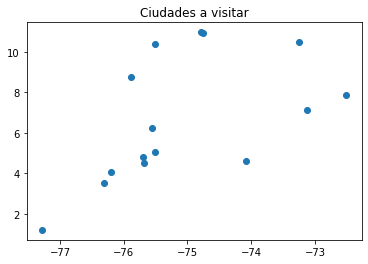

Beginning ACO Optimization with 100 iterations...
Best score at iteration 0: 33.23; overall: 33.23 (0s)
Best score at iteration 1: 34.44; overall: 33.23 (0s)
Best score at iteration 2: 30.57; overall: 30.57 (0s)
Best score at iteration 3: 31.93; overall: 30.57 (0s)
Best score at iteration 4: 34.74; overall: 30.57 (0s)
Best score at iteration 5: 33.9; overall: 30.57 (0s)
Best score at iteration 6: 28.68; overall: 28.68 (0s)
Best score at iteration 7: 25.62; overall: 25.62 (0s)
Best score at iteration 8: 26.54; overall: 25.62 (0s)
Best score at iteration 9: 25.62; overall: 25.62 (0s)
Best score at iteration 10: 25.06; overall: 25.06 (0s)
Best score at iteration 11: 25.62; overall: 25.06 (0s)
Best score at iteration 12: 25.62; overall: 25.06 (0s)
Best score at iteration 13: 25.06; overall: 25.06 (0s)
Best score at iteration 14: 25.62; overall: 25.06 (0s)
Best score at iteration 15: 25.62; overall: 25.06 (0s)
Best score at iteration 16: 23.32; overall: 23.32 (0s)
Best score at iteration 17

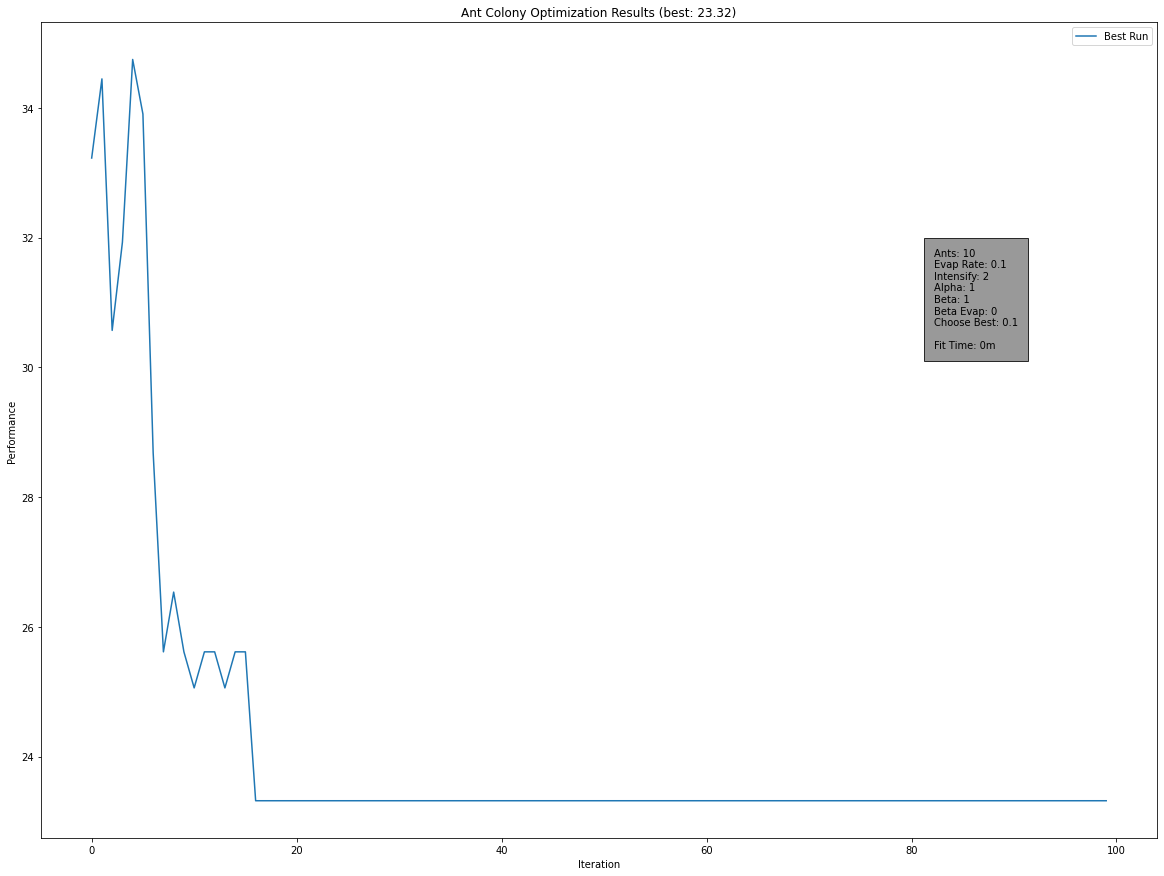

[1, 3, 13, 14, 7, 9, 11, 10, 8, 12, 6, 4, 5, 2, 0, 1]


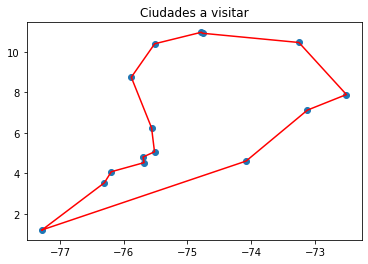

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time

import warnings

warnings.filterwarnings("ignore")


class AntColonyOptimizer:
    def __init__(self, ants, evaporation_rate, intensification, alpha=1.0, beta=0.0, beta_evaporation_rate=0,
                 choose_best=.1):
        """
        Ant colony optimizer.  Traverses a graph and finds either the max or min distance between nodes.
        :param ants: number of ants to traverse the graph
        :param evaporation_rate: rate at which pheromone evaporates
        :param intensification: constant added to the best path
        :param alpha: weighting of pheromone
        :param beta: weighting of heuristic (1/distance)
        :param beta_evaporation_rate: rate at which beta decays (optional)
        :param choose_best: probability to choose the best route
        """
        # Parameters
        self.ants = ants
        self.evaporation_rate = evaporation_rate
        self.pheromone_intensification = intensification
        self.heuristic_alpha = alpha
        self.heuristic_beta = beta
        self.beta_evaporation_rate = beta_evaporation_rate
        self.choose_best = choose_best

        # Internal representations
        self.pheromone_matrix = None
        self.heuristic_matrix = None
        self.probability_matrix = None

        self.map = None
        self.set_of_available_nodes = None

        # Internal stats
        self.best_series = []
        self.best = None
        self.fitted = False
        self.best_path = None
        self.fit_time = None

        # Plotting values
        self.stopped_early = False

    def __str__(self):
        string = "Ant Colony Optimizer"
        string += "\n--------------------"
        string += "\nDesigned to optimize either the minimum or maximum distance between nodes in a square matrix that behaves like a distance matrix."
        string += "\n--------------------"
        string += "\nNumber of ants:\t\t\t\t{}".format(self.ants)
        string += "\nEvaporation rate:\t\t\t{}".format(self.evaporation_rate)
        string += "\nIntensification factor:\t\t{}".format(self.pheromone_intensification)
        string += "\nAlpha Heuristic:\t\t\t{}".format(self.heuristic_alpha)
        string += "\nBeta Heuristic:\t\t\t\t{}".format(self.heuristic_beta)
        string += "\nBeta Evaporation Rate:\t\t{}".format(self.beta_evaporation_rate)
        string += "\nChoose Best Percentage:\t\t{}".format(self.choose_best)
        string += "\n--------------------"
        string += "\nUSAGE:"
        string += "\nNumber of ants influences how many paths are explored each iteration."
        string += "\nThe alpha and beta heuristics affect how much influence the pheromones or the distance heuristic weigh an ants' decisions."
        string += "\nBeta evaporation reduces the influence of the heuristic over time."
        string += "\nChoose best is a percentage of how often an ant will choose the best route over probabilistically choosing a route based on pheromones."
        string += "\n--------------------"
        if self.fitted:
            string += "\n\nThis optimizer has been fitted."
        else:
            string += "\n\nThis optimizer has NOT been fitted."
        return string

    def _initialize(self):
        """
        Initializes the model by creating the various matrices and generating the list of available nodes
        """
        assert self.map.shape[0] == self.map.shape[1], "Map is not a distance matrix!"
        num_nodes = self.map.shape[0]
        self.pheromone_matrix = np.ones((num_nodes, num_nodes))
        # Remove the diagonal since there is no pheromone from node i to itself
        self.pheromone_matrix[np.eye(num_nodes) == 1] = 0
        self.heuristic_matrix = 1 / self.map
        self.probability_matrix = (self.pheromone_matrix ** self.heuristic_alpha) * (
                self.heuristic_matrix ** self.heuristic_beta)  # element by element multiplcation
        self.set_of_available_nodes = list(range(num_nodes))

    def _reinstate_nodes(self):
        """
        Resets available nodes to all nodes for the next iteration
        """
        self.set_of_available_nodes = list(range(self.map.shape[0]))

    def _update_probabilities(self):
        """
        After evaporation and intensification, the probability matrix needs to be updated.  This function
        does that.
        """
        self.probability_matrix = (self.pheromone_matrix ** self.heuristic_alpha) * (
                self.heuristic_matrix ** self.heuristic_beta)

    def _choose_next_node(self, from_node):
        """
        Chooses the next node based on probabilities.  If p < p_choose_best, then the best path is chosen, otherwise
        it is selected from a probability distribution weighted by the pheromone.
        :param from_node: the node the ant is coming from
        :return: index of the node the ant is going to
        """
        numerator = self.probability_matrix[from_node, self.set_of_available_nodes]
        if np.random.random() < self.choose_best:
            next_node = np.argmax(numerator)
        else:
            denominator = np.sum(numerator)
            probabilities = numerator / denominator
            next_node = np.random.choice(range(len(probabilities)), p=probabilities)
        return next_node

    def _remove_node(self, node):
        self.set_of_available_nodes.remove(node)

    def _evaluate(self, paths, mode):
        """
        Evaluates the solutions of the ants by adding up the distances between nodes.
        :param paths: solutions from the ants
        :param mode: max or min
        :return: x and y coordinates of the best path as a tuple, the best path, and the best score
        """
        scores = np.zeros(len(paths))
        coordinates_i = []
        coordinates_j = []
        for index, path in enumerate(paths):
            score = 0
            coords_i = []
            coords_j = []
            for i in range(len(path) - 1):
                coords_i.append(path[i])
                coords_j.append(path[i + 1])
                score += self.map[path[i], path[i + 1]]
            scores[index] = score
            coordinates_i.append(coords_i)
            coordinates_j.append(coords_j)
        if mode == 'min':
            best = np.argmin(scores)
        elif mode == 'max':
            best = np.argmax(scores)
        return (coordinates_i[best], coordinates_j[best]), paths[best], scores[best]

    def _evaporation(self):
        """
        Evaporate some pheromone as the inverse of the evaporation rate.  Also evaporates beta if desired.
        """
        self.pheromone_matrix *= (1 - self.evaporation_rate)
        self.heuristic_beta *= (1 - self.beta_evaporation_rate)

    def _intensify(self, best_coords):
        """
        Increases the pheromone by some scalar for the best route.
        :param best_coords: x and y (i and j) coordinates of the best route
        """
        i = best_coords[0]
        j = best_coords[1]
        self.pheromone_matrix[i, j] += self.pheromone_intensification

    def fit(self, map_matrix, iterations=100, mode='min', early_stopping_count=20, verbose=True):
        """
        Fits the ACO to a specific map.  This was designed with the Traveling Salesman problem in mind.
        :param map_matrix: Distance matrix or some other matrix with similar properties
        :param iterations: number of iterations
        :param mode: whether to get the minimum path or maximum path
        :param early_stopping_count: how many iterations of the same score to make the algorithm stop early
        :return: the best score
        """
        if verbose: print("Beginning ACO Optimization with {} iterations...".format(iterations))
        self.map = map_matrix
        start = time.time()
        self._initialize()
        num_equal = 0

        for i in range(iterations):
            start_iter = time.time()
            paths = []
            path = []

            for ant in range(self.ants):
                current_node = self.set_of_available_nodes[np.random.randint(0, len(self.set_of_available_nodes))]
                start_node = current_node
                while True:
                    path.append(current_node)
                    self._remove_node(current_node)
                    if len(self.set_of_available_nodes) != 0:
                        current_node_index = self._choose_next_node(current_node)
                        current_node = self.set_of_available_nodes[current_node_index]
                    else:
                        break

                path.append(start_node)  # go back to start
                self._reinstate_nodes()
                paths.append(path)
                path = []

            best_path_coords, best_path, best_score = self._evaluate(paths, mode)

            if i == 0:
                best_score_so_far = best_score
            else:
                if mode == 'min':
                    if best_score < best_score_so_far:
                        best_score_so_far = best_score
                        self.best_path = best_path
                elif mode == 'max':
                    if best_score > best_score_so_far:
                        best_score_so_far = best_score
                        self.best_path = best_path

            if best_score == best_score_so_far:
                num_equal += 1
            else:
                num_equal = 0

            self.best_series.append(best_score)
            self._evaporation()
            self._intensify(best_path_coords)
            self._update_probabilities()

            if verbose: print("Best score at iteration {}: {}; overall: {} ({}s)"
                              "".format(i, round(best_score, 2), round(best_score_so_far, 2),
                                        round(time.time() - start_iter)))

            if best_score == best_score_so_far and num_equal == early_stopping_count:
                self.stopped_early = True
                print("Stopping early due to {} iterations of the same score.".format(early_stopping_count))
                break

        self.fit_time = round(time.time() - start)
        self.fitted = True

        if mode == 'min':
            self.best = self.best_series[np.argmin(self.best_series)]
            if verbose: print(
                "ACO fitted.  Runtime: {} minutes.  Best score: {}".format(self.fit_time // 60, self.best))
            return self.best
        elif mode == 'max':
            self.best = self.best_series[np.argmax(self.best_series)]
            if verbose: print(
                "ACO fitted.  Runtime: {} minutes.  Best score: {}".format(self.fit_time // 60, self.best))
            return self.best
        else:
            raise ValueError("Invalid mode!  Choose 'min' or 'max'.")

    def plot(self):
        """
        Plots the score over time after the model has been fitted.
        :return: None if the model isn't fitted yet
        """
        if not self.fitted:
            print("Ant Colony Optimizer not fitted!  There exists nothing to plot.")
            return None
        else:
            fig, ax = plt.subplots(figsize=(20, 15))
            ax.plot(self.best_series, label="Best Run")
            ax.set_xlabel("Iteration")
            ax.set_ylabel("Performance")
            ax.text(.8, .6,
                    'Ants: {}\nEvap Rate: {}\nIntensify: {}\nAlpha: {}\nBeta: {}\nBeta Evap: {}\nChoose Best: {}\n\nFit Time: {}m{}'.format(
                        self.ants, self.evaporation_rate, self.pheromone_intensification, self.heuristic_alpha,
                        self.heuristic_beta, self.beta_evaporation_rate, self.choose_best, self.fit_time // 60,
                        ["\nStopped Early!" if self.stopped_early else ""][0]),
                    bbox={'facecolor': 'gray', 'alpha': 0.8, 'pad': 10}, transform=ax.transAxes)
            ax.legend()
            plt.title("Ant Colony Optimization Results (best: {})".format(np.round(self.best, 2)))
            plt.show()

from numpy.random import seed
from numpy.random import rand
seed(123)
n_ciudades = 15
Ciudades = np.array(np.random.random(2*n_ciudades)).reshape(15,2)
print(Ciudades)
ciudades_colombia=np.array([[-76.30361,3.53944],[-77.28111,1.21361],[-76.19536,4.08466],[-74.08175,4.60971],[-75.69611,4.81333],
[-75.68111,4.53389],[-75.51738,5.06889],[-73.25322,10.46314],[-75.88143,8.74798],[-74.76459,10.91843],
[-75.51444,10.39972],[-74.78132,10.96854],[-75.56359,6.25184],[-73.1198,7.12539],[-72.50782,7.89391]])
print(ciudades_colombia)
Ciudades=ciudades_colombia
from scipy.spatial import distance_matrix
M = distance_matrix(Ciudades,Ciudades)
print(M)

plt.scatter(Ciudades[:,0],Ciudades[:,1])
plt.title("Ciudades a visitar")
plt.show()

problem = M
optimizer = AntColonyOptimizer(ants=10, evaporation_rate=.1, intensification=2, alpha=1, beta=1,
                               beta_evaporation_rate=0, choose_best=.1)

best = optimizer.fit(problem, 100)
optimizer.plot()

optimizer.best_path
# con el optimizer.best path obtenemos el array con el orden optimo, graficaremos mas adelante el grafico perfeccionado 
# reutilizando codigo del mapa del algoritmo genetico
print(optimizer.best_path)



plt.scatter(Ciudades[:,0],Ciudades[:,1])
plt.plot(Ciudades[optimizer.best_path,0],Ciudades[optimizer.best_path,1],'-r')
plt.title("Ciudades a visitar")
plt.show()

# Solucion mediante algoritmos geneticos


## Implementacion

In [10]:
#El objetivo de GeoPandas es facilitar el trabajo con datos geoespaciales en python. 
#Combina las capacidades de pandas y shapely, proporcionando operaciones geoespaciales en pandas
#y una interfaz de alto nivel para múltiples geometrías a shapely. 
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
# PyGAD es una librería Python de código abierto para construir el algoritmo genético y 
# optimizar algoritmos de aprendizaje automático. Funciona con Keras y PyTorch.
!pip install pygad==2.17

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 4.8 MB/s eta 0:00:00


In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

# Coordenadas de las ciudades en colombia
df = pd.DataFrame({
    'City': ['Palmira', 'Pasto', 'Tuluá', 'Bogota', 'Pereira','Armenia','Manizales','Valledupar','Montería','Soledad','Cartagena','Barranquilla','Medellín','Bucaramanga','Cúcuta'],
    'latitude': [3.53944, 1.21361, 4.08466, 4.60971, 4.81333,4.53389,5.06889,10.46314,8.74798 ,10.91843,10.39972,10.96854,6.25184,7.12539,7.89391],
    'longitude': [-76.30361, -77.28111, -76.19536, -74.08175, -75.69611,-75.68111,-75.51738,-73.25322,-75.88143,-74.76459,-75.51444,-74.78132,-75.56359,-73.1198,-72.50782]
})

df.head()

,City,latitude,longitude
0,Palmira,3.53944,-76.30361
1,Pasto,1.21361,-77.28111
2,Tuluá,4.08466,-76.19536
3,Bogota,4.60971,-74.08175
4,Pereira,4.81333,-75.69611


Se procede a resaltar dentro del mapa de Colombia cada una de las coordenadas 

In [13]:
#folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the 
#binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.
import folium

#Se crea el mapa centrado en unas coordenadas
# Las coordenadas (4.570868, -74.297333) pertenecen a Colombia
map = folium.Map(location=[4.570868, -74.297333], zoom_start=6, tiles="stamentoner")

In [14]:
# Metodo para marcar en el mapa cada una de las ciudades
for _, r in df.iterrows():
  folium.Marker(
      [r['latitude'], r['longitude']], popup=f'<i>{r["City"]}</i>'
  ).add_to(map)

In [15]:
map

**Comprobación de la metodología de la distancia**

Para evaluar la calidad de cada solución, es necesario disponer de una medida de adecuación. En este ejemplo se ha utilizado la distancia "a vuelo de pájaro" sin tener en cuenta las distancias reales por carretera.

In [16]:
from geopy.distance import geodesic
# Se mide la distancia entre algunas ciudades para comparar

#Palmira
origin = (df['latitude'][0], df['longitude'][0])
#Pasto
dest1 = (df['latitude'][1], df['longitude'][1])
#Tulua
dest2 = (df['latitude'][2], df['longitude'][2])

A = geodesic(origin, dest1).kilometers
B = geodesic(origin, dest2).kilometers

print('La distancia entre Palmira y Pasto: ' , A, "kilometros")
print('La distancia entre Palmira y Tulua: ' , B, "kilometros")

La distancia entre Palmira y Pasto:  279.21546355148536 kilometros
La distancia entre Palmira y Tulua:  61.477267778467635 kilometros


Esta distancia, es una distancia relativa ya que se toma como una línea recta entre los puntos del mapa y no se consideran las curvas o cambios de nivel de un camino por carretera común. 

Por ejemplo, entre los territorios de Palmira y Pasto se calculan realmente 398,4 km y entre Palmira y Tuluá se calcula una distancia de 78,5 km. 



### Definición de funciones

El algoritmo requiere un conjunto de funciones predefinidas, ya que el algoritmo genético "out of the box" no soporta un TSP.

1. build_population: construye una población de cromosomas para probar con las restricciones aplicadas apropiadamente.
2. fitness_func: Se utiliza para probar una solución, para ver qué tan bien se desempeña, en este caso el fitness_func se evaluará sobre la base de la distancia a vuelo de pájaro entre cada punto sucesivo
3. pmx_crossover: Realiza el cruce de un padre y un hijo con la lógica Partially Matched Crossover (PMX).
4. crossover_func: Aplica el cruce
5. on_crossover: Aplica la mutación después del cruce
6. on_generation: Se utiliza para imprimir el progreso y los resultados en cada generación

In [17]:
import pygad
import random
import numpy as np


def build_population(size, chromosome_size):
  population = []
  for i in range(size):
    home_city = 0
    added = {home_city:'Added'}
    chromosome = [home_city]

    while len(chromosome) < chromosome_size:
      proposed_gene = random.randint(0, chromosome_size-1)
      if added.get(proposed_gene) is None:
        chromosome.append(proposed_gene)
        added.update({proposed_gene:'Added'})
      else:
        pass

    chromosome.append(home_city)

    population.append(chromosome)

  return np.array(population)


In [18]:
# Gen - una ciudad a visitar en una solución dada
genes = {city_num:[lat, lon] for city_num, lat, lon in zip(df['City'], df['latitude'], df['longitude'])}
# Cities contiene las keys del anterior diccionario por tanto el nombre las ciudades
cities = list(genes.keys())
genes

{'Palmira': [3.53944, -76.30361],
 'Pasto': [1.21361, -77.28111],
 'Tuluá': [4.08466, -76.19536],
 'Bogota': [4.60971, -74.08175],
 'Pereira': [4.81333, -75.69611],
 'Armenia': [4.53389, -75.68111],
 'Manizales': [5.06889, -75.51738],
 'Valledupar': [10.46314, -73.25322],
 'Montería': [8.74798, -75.88143],
 'Soledad': [10.91843, -74.76459],
 'Cartagena': [10.39972, -75.51444],
 'Barranquilla': [10.96854, -74.78132],
 'Medellín': [6.25184, -75.56359],
 'Bucaramanga': [7.12539, -73.1198],
 'Cúcuta': [7.89391, -72.50782]}

In [19]:
# Población - el conjunto de cromosomas
# Se crea una poblacion con 150 posibles soluciones
population = build_population(150, 15)
# Note que el tamaño de cada solución es de 16, esto dado que se cuenta un paso extra para volver a la ciudad donde se comenzó. 
len(population[0])

16

In [20]:
def fitness_func(solution, solution_idx):
  # bucle a través de la longitud del cromosoma encontrando la distancia entre cada
  # gen añadido

  total_dist = 0

  for gene in range(0, len(solution)):

    # Se obtiene la latitud y longitud de un gen en una solucion dada
    a = genes.get(cities[solution[gene]])
    
    try:
      # Se obtiene la latitud y longitud de un gen en la siguiente posicion al gen anterior
      b = genes.get(cities[solution[gene + 1]])

      # se encuentra la distancia (en línea recta)
      dist = geodesic(a, b).kilometers

    except IndexError:
      dist = 0

    total_dist += dist

  # para optimizar este valor en sentido positivo se utiliza la inversa de la distancia
  fitness = 1 / total_dist

  return fitness 

Los algoritmos genéticos de PyGad vienen con varios operadores de cruce. Sin embargo, ¡ninguno de ellos es adecuado para el TSP! para evitar este conflicto se aplica el método Partially Matched Crossover (PMX).

La razón detrás de cruce es combinar muy buenas soluciones en un esfuerzo por hacer dos aún mejores soluciones hijo. PMX hace esto por:

1. Define una serie de genes en el padre 1
2. Pasar estos genes al hijo
3. Encontrar el primer gen en el padre 2 que no está ya en el hijo
4. Si este gen o la posición de este gen ya está en el hijo, entonces busque en el padre 1 para ver de qué gen se trata.
5. Iterar hasta que se encuentre una posición para cada gen que le falta al hijo en el padre 2.
6. Repita el proceso con el padre 2 como padre 1

In [21]:
def pmx_crossover(parent1, parent2, sequence_start, sequence_end):
  # inicializar un niño
  child = np.zeros(parent1.shape[0])

  # obtener los genes del progenitor 1 que se transmiten al hijo uno
  parent1_to_child1_genes = parent1[sequence_start:sequence_end]

  # obtener la posición de los genes para cada combinación respectiva
  parent1_to_child1 =  np.isin(parent1,parent1_to_child1_genes).nonzero()[0]

  for gene in parent1_to_child1:
    child[gene] = parent1[gene]

  # gen del progenitor 2 no en el hijo
  genes_not_in_child = parent2[np.isin(parent2, parent1_to_child1_genes, invert=True).nonzero()[0]]
  
  # si el gen no está ya
  if genes_not_in_child.shape[0] >= 1:
    for gene in genes_not_in_child:
      if gene >= 1:
        lookup = gene
        not_in_sequence = True

        while not_in_sequence:
          position_in_parent2 = np.where(parent2==lookup)[0][0]

          if position_in_parent2 in range(sequence_start, sequence_end):
            lookup = parent1[position_in_parent2]

          else:
            child[position_in_parent2] = gene
            not_in_sequence = False

  return child

In [22]:
def crossover_func(parents, offspring_size, ga_instance):
  offspring = []
  idx = 0
  while len(offspring) != offspring_size[0]:

    # localizar a los padres
    parent1 = parents[idx % parents.shape[0], :].copy()
    parent2 = parents[(idx + 1) % parents.shape[0], :].copy()

    # encontrar la secuencia genética en el progenitor 1 
    sequence_start = random.randint(1, parent1.shape[0]-4)
    sequence_end = random.randint(sequence_start, parent1.shape[0]-1)

    # realizar el cruce
    child1 = pmx_crossover(parent1, parent2, sequence_start, sequence_end)
    child2 = pmx_crossover(parent2, parent1, sequence_start, sequence_end)
    

    offspring.append(child1)
    offspring.append(child2)

    idx += 1

  return np.array(offspring)

Para el TSP tampoco hay funciones de mutación listas para usar, por tanto se procede a crear una funcion. La mutación utilizada es una inversión, en la que se define una secuencia de genes de longitud aleatoria y luego se invierte, de modo que [..., 1, 2, 4, ...] se convertiría en [..., 4, 2, 1, ...]. La implementación del código es más sencilla que el cruce:

In [23]:
def mutation_func(offspring, ga_instance):

  for chromosome_idx in range(offspring.shape[0]):
    # definir una secuencia de genes para invertir
    sequence_start = random.randint(1, offspring[chromosome_idx].shape[0] - 2)
    sequence_end = random.randint(sequence_start, offspring[chromosome_idx].shape[0] - 1)
    
    genes = offspring[chromosome_idx, sequence_start:sequence_end]

    # empezar al principio de la secuencia asignando la secuencia inversa al cromosoma
    index = 0
    if len(genes) > 0:
      for gene in range(sequence_start, sequence_end):

          offspring[chromosome_idx, gene] = genes[index]

          index += 1

    return offspring

In [24]:
def on_generation(ga):
    print("Generation", ga.generations_completed)
    print(ga.population)

Lo más importante es la implementación de las funciones personalizadas. Así como algunos otros parámetros, a saber

- **num_generations:** el número de iteraciones para ejecutar el proceso de inicialización, selección, reproducción y mutación
- **sol_per_pop:** el número de soluciones totales por generación
- **num_parents:** número de progenitores que se reproducen en función de la aptitud (este valor se mantiene bastante alto para garantizar la diversidad del conjunto de soluciones).
- **keep_parents:** mantiene los dos progenitores más aptos en cada generación (elitismo) para que puedan seguir considerándose soluciones aptas hasta que sean superados en el ranking y seleccionados en su contra más adelante.

In [25]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=40,
                       fitness_func=fitness_func,
                       sol_per_pop=200,
                       initial_population=population,
                       gene_space=range(0, 15),
                       gene_type=int,
                       mutation_type=mutation_func,
                       on_generation=on_generation,
                       crossover_type=crossover_func, 
                       keep_parents=6,
                       mutation_probability=0.4)

In [26]:
ga_instance.run()

Generation 1
[[ 0  5  1 ...  3  4  0]
 [ 0  5 14 ... 12 13  0]
 [ 0  8  1 ...  7  6  0]
 ...
 [ 0  7 13 ...  6  3  0]
 [ 0  9 14 ...  5  2  0]
 [ 0 11  7 ... 10  8  0]]
Generation 2
[[ 0  8  3 ...  4  2  0]
 [ 0  5  1 ...  3  4  0]
 [ 0  8  1 ...  7  6  0]
 ...
 [ 0 11  2 ... 12  6  0]
 [ 0  4 11 ... 10 14  0]
 [ 0  6 12 ...  8  9  0]]
Generation 3
[[ 0  5  1 ...  4  2  0]
 [ 0  4  2 ...  6  1  0]
 [ 0  3  6 ...  1  4  0]
 ...
 [ 0  5 14 ... 12 13  0]
 [ 0  5  1 ... 12  6  0]
 [ 0  8 14 ...  7 13  0]]
Generation 4
[[0 5 1 ... 4 2 0]
 [0 5 1 ... 4 2 0]
 [0 5 1 ... 4 2 0]
 ...
 [0 8 3 ... 1 4 0]
 [0 8 3 ... 4 2 0]
 [0 8 3 ... 2 4 0]]
Generation 5
[[0 5 1 ... 4 2 0]
 [0 5 1 ... 4 2 0]
 [0 5 1 ... 4 2 0]
 ...
 [0 4 2 ... 6 1 0]
 [0 6 2 ... 4 5 0]
 [0 5 3 ... 1 4 0]]
Generation 6
[[ 0  1  5 ...  4  2  0]
 [ 0  5  1 ...  4  2  0]
 [ 0  4  6 ... 12  1  0]
 ...
 [ 0  5  1 ...  4  2  0]
 [ 0  5  1 ...  4  2  0]
 [ 0  5  1 ...  4  2  0]]
Generation 7
[[0 1 5 ... 4 2 0]
 [0 1 5 ... 4 2 0]
 [0 1 5

### Resultados


In [27]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f'Generation of best solution: {ga_instance.best_solution_generation}')
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Generation of best solution: 9
Fitness value of the best solution = 0.0003035208680278246
Index of the best solution : 0


In [28]:
def verify_solution(solution, max_gene):
  if min(solution) != 0:
    print('Failed values below 0')

  if max(solution) != max_gene:
    print('Failed values less than or above max possible value')

  if len(set(solution)) - len(solution) != -1:
    print(len(set(solution)) - len(solution))
    print('Failed solution does not contain unique values')

In [29]:
verify_solution(solution, len(cities))
solution

Failed values less than or above max possible value


array([ 0,  1,  5,  4,  3,  2,  8,  9, 11, 10,  7, 14, 13, 12,  6,  0])

In [30]:
df.head(15)

,City,latitude,longitude
0,Palmira,3.53944,-76.30361
1,Pasto,1.21361,-77.28111
2,Tuluá,4.08466,-76.19536
3,Bogota,4.60971,-74.08175
4,Pereira,4.81333,-75.69611
5,Armenia,4.53389,-75.68111
6,Manizales,5.06889,-75.51738
7,Valledupar,10.46314,-73.25322
8,Montería,8.74798,-75.88143
9,Soledad,10.91843,-74.76459


In [31]:
points = [genes.get(cities[id]) + [cities[id]] for id in solution]
points[:5]

[[3.53944, -76.30361, 'Palmira'],
 [1.21361, -77.28111, 'Pasto'],
 [4.53389, -75.68111, 'Armenia'],
 [4.81333, -75.69611, 'Pereira'],
 [4.60971, -74.08175, 'Bogota']]

In [32]:
points


[[3.53944, -76.30361, 'Palmira'],
 [1.21361, -77.28111, 'Pasto'],
 [4.53389, -75.68111, 'Armenia'],
 [4.81333, -75.69611, 'Pereira'],
 [4.60971, -74.08175, 'Bogota'],
 [4.08466, -76.19536, 'Tuluá'],
 [8.74798, -75.88143, 'Montería'],
 [10.91843, -74.76459, 'Soledad'],
 [10.96854, -74.78132, 'Barranquilla'],
 [10.39972, -75.51444, 'Cartagena'],
 [10.46314, -73.25322, 'Valledupar'],
 [7.89391, -72.50782, 'Cúcuta'],
 [7.12539, -73.1198, 'Bucaramanga'],
 [6.25184, -75.56359, 'Medellín'],
 [5.06889, -75.51738, 'Manizales'],
 [3.53944, -76.30361, 'Palmira']]

In [33]:
map = folium.Map(location=[4.570868, -74.297333], zoom_start=6, tiles="stamentoner")

for point in range(0, len(points)):
  folium.Marker(
      [points[point][0], points[point][1]], popup=f'<i>{points[point][2]}</i>'
  ).add_to(map)

  try:
    folium.PolyLine([(points[point][0], points[point][1]), 
                      (points[point+1][0], points[point+1][1])],
                  color='red',
                  weight=5,
                  opacity=0.8).add_to(map)

  except IndexError:
    pass

In [34]:
map

# Generacion del mapa con el algoritmo de las colonias

In [36]:
points=[[1.21361, -77.28111, 'Pasto'],
 [4.60971, -74.08175, 'Bogota'],
 [7.12539, -73.1198, 'Bucaramanga'],
 [7.89391, -72.50782, 'Cúcuta'],
 [10.46314, -73.25322, 'Valledupar'],
 [10.91843, -74.76459, 'Soledad'],
 [10.96854, -74.78132, 'Barranquilla'],
 [10.39972, -75.51444, 'Cartagena'],
 [8.74798, -75.88143, 'Montería'],
 [6.25184, -75.56359, 'Medellín'],
 [5.06889, -75.51738, 'Manizales'],
 [4.81333, -75.69611, 'Pereira'],
 [4.53389, -75.68111, 'Armenia'],
 [4.08466, -76.19536, 'Tuluá'],
 [3.53944, -76.30361, 'Palmira'],
 [1.21361, -77.28111, 'Pasto']]

In [37]:
map = folium.Map(location=[4.570868, -74.297333], zoom_start=6, tiles="stamentoner")

for point in range(0, len(points)):
  folium.Marker(
      [points[point][0], points[point][1]], popup=f'<i>{points[point][2]}</i>'
  ).add_to(map)

  try:
    folium.PolyLine([(points[point][0], points[point][1]), 
                      (points[point+1][0], points[point+1][1])],
                  color='red',
                  weight=5,
                  opacity=0.8).add_to(map)

  except IndexError:
    pass

In [38]:
map

## Referencias

https://en.wikipedia.org/wiki/Travelling_salesman_problem

https://es.wikipedia.org/wiki/Algoritmo_genético

https://medium.com/geekculture/adapting-genetic-algorithm-packages-for-the-travelling-salesman-problem-ecbdf6c9b99c

https://github.com/josephlewisjgl/TravellingCoffeeDrinker/blob/main/genetic_algorithm.ipynb

# Comparacion entre algoritmos

In [35]:
# algoritmo de colonias

def transformar_hora(cadena):
    y=cadena.split(':')
    hora=int(y[0])
    min=int(y[1])/60
    hora_def=hora+min
    return hora_def
# transformar_hora("")
print("INFO ALGORITMO COLONIA DE HORMIGAS")
print("")
recorrido_ant=['Pasto', 'Bogota', 'Bucaramanga', 'Cúcuta', 'Valledupar', 'Soledad', 'Barranquilla', 'Cartagena', 'Montería', 'Medellín', 'Manizales', 'Pereira', 'Armenia', 'Tuluá', 'Palmira', 'Pasto']

num_km_ant=[837,429,197,541,296,16.4,119,258,405,211,53.6,46.1,87.2,72.4,401]
num_horas_ant=[transformar_hora("17:28"),transformar_hora("09:04"),transformar_hora("05:17"),
             transformar_hora("10:25"),transformar_hora("04:54"),transformar_hora("00:31"),
             transformar_hora("02:14"),transformar_hora("04:21"),transformar_hora("08:08"),
             transformar_hora("05:25"),transformar_hora("01:19"),transformar_hora("01:04"),
             transformar_hora("01:35"),transformar_hora("01:15"),transformar_hora("04:36")]

num_peajes_ant=[14,8,3,4,5,0,3,8,8,3,3,1,2,2,6]

num_valor_total_peajes_ant=[128000,60400,17300,33100,48700,0,24900,73500,80200,28300,35200,14500,20400,18400,46600]

total_km_ant=sum(num_km_ant)
total_horas_ant=sum(num_horas_ant)
total_peajes_ant=sum(num_peajes_ant)
total_valor_peajes_ant=sum(num_valor_total_peajes_ant)
print(f'el total de km en algoritmo de la colonia de hormigas es de : {total_km_ant} km')
print(f'el total de horas en todo el recorrido en el algoritmo de la colonia de hormigas es de: {total_horas_ant}')
print(f'el total de puestos de peajes en el algoritmo de la colonia de hormigas es de: {total_peajes_ant}')
print(f'el total valor en peajes en algoritmo de la colonia de hormigas es de : {total_valor_peajes_ant} pesos')

# algoritmo genetico
# usando un caso de estudio
print("")
print("INFO ALGORITMO GENETICO")
print("")
recorrido_gen=['Palmira', 'Tuluá', 'Pereira', 'Montería', 'Barranquilla', 'Soledad', 'Cartagena', 'Valledupar', 'Medellín', 'Bucaramanga', 'Cúcuta', 'Bogota', 'Manizales', 'Armenia', 'Pasto', 'Palmira']

num_km_gen=[72.4,118,614,357,16.4,129,369,749,388,197,558,290,98.4,554,401]
num_horas_gen=[transformar_hora("01:15"),transformar_hora("02:02"),transformar_hora("12:38"),
             transformar_hora("06:13"),transformar_hora("00:31"),transformar_hora("02:21"),
             transformar_hora("06:19"),transformar_hora("12:56"),transformar_hora("07:46"),
             transformar_hora("05:17"),transformar_hora("12:13"),transformar_hora("07:18"),
             transformar_hora("02:14"),transformar_hora("10:55"),transformar_hora("04:36")]
num_peajes_gen=[2,2,13,7,0,3,6,11,8,3,7,4,9,9,6]

num_valor_total_peajes_gen=[18400,22100,131800,48500,0,24900,52400,103000,73600,17300,42700,40800,49700,76300,46600]

# print(len(num_km_gen))
# print(len(num_valor_total_peajes_gen))
total_km_gen=sum(num_km_gen)
total_horas_gen=sum(num_horas_gen)
total_peajes_gen=sum(num_peajes_gen)
total_valor_peajes_gen=sum(num_valor_total_peajes_gen)
print(f'el total de km en algoritmo genetico es de : {total_km_gen} km')
print(f'el total de horas en todo el recorrido en el algoritmo genetico es de: {total_horas_gen}')
print(f'el total de puestos de peajes en el algoritmo genetico es de: {total_peajes_gen}')
print(f'el total valor en peajes en algoritmo genetico es de : {total_valor_peajes_gen} pesos')

INFO ALGORITMO COLONIA DE HORMIGAS

el total de km en algoritmo de la colonia de hormigas es de : 3969.7 km
el total de horas en todo el recorrido en el algoritmo de la colonia de hormigas es de: 77.59999999999998
el total de puestos de peajes en el algoritmo de la colonia de hormigas es de: 70
el total valor en peajes en algoritmo de la colonia de hormigas es de : 629500 pesos

INFO ALGORITMO GENETICO

el total de km en algoritmo genetico es de : 4911.200000000001 km
el total de horas en todo el recorrido en el algoritmo genetico es de: 94.56666666666666
el total de puestos de peajes en el algoritmo genetico es de: 90
el total valor en peajes en algoritmo genetico es de : 748100 pesos
